# Лабораторная работа 5. Алгоритмы сортировки и поиска.

# 1. Алгоритмы сортировки.

In [22]:
ary = [1,3,5,1,2,3,5,4,2,34,43,24]

# 1.1. Сортировка выбором

Алгоритм:
- найти наименьший элемент в неотсортированной части массива;
- поставить его в начало;
- сдвинуть начало неотсортированной части. 

Сложность: $O(n^2)$.

Программа:

In [83]:
def selection_sort(arrayToSort):
    a = arrayToSort.copy()
    n = len(a)
    for i in range(n):
        idxMin = i
        for j in range(i+1, n):
            if a[j] < a[idxMin]:
                idxMin = j
        tmp = a[idxMin]
        a[idxMin] = a[i]
        a[i] = tmp
    return a

Тестовый запуск:

In [84]:
print (selection_sort(ary))

[1, 1, 1, 2, 2, 3, 4, 5, 5, 7, 8, 13, 44]


# 1.2. Сортировка вставками

Алгоритм:
- из неотсортированной части берется элемент;
- вставляется в отсортированную часть на своё мосто (в начале массива). 

Сложность: $O(n^2)$.

In [1]:
def insertion_sort(arrayToSort):
    a = arrayToSort.copy()
    n = len(a)
    for i in range(n):
        v = a[i]
        j = i
        while (a[j-1] > v) and (j > 0):
            a[j] = a[j-1]
            j = j - 1
        a[j] = v
    return a

In [4]:
print (insertion_sort(ary))

[0, 1, 2, 2, 3, 3, 4, 5, 5, 24, 34, 43]


In [61]:
ary

[0, 3, 5, 1, 2, 3, 5, 4, 2, 34, 43, 24]

# 1.3. Сортировка методом пузырька

Алгоритм:
- последовательно сравниваются пары элементов идущих друг за другом;
- в случае несоответствия выбранному порядку меняются местами. 

Сложность: $O(n^2)$.

In [62]:
def bubble_sort(arrayToSort):
    a = arrayToSort.copy()
    n = len(a)
    for i in range(n,0,-1):
        for j in range(1, i):
            if a[j-1] > a[j]:
                tmp = a[j-1]
                a[j-1] = a[j]
                a[j] = tmp
    return a

In [63]:
print (bubble_sort(ary))

[0, 1, 2, 2, 3, 3, 4, 5, 5, 24, 34, 43]


In [64]:
ary

[0, 3, 5, 1, 2, 3, 5, 4, 2, 34, 43, 24]

# 1.4. Сортировка слиянием

Алгоритм:
- сортируемый массив разбивается на две части примерно одинакового размера;
- каждая из получившихся частей сортируется отдельно, например — тем же самым алгоритмом;
- два упорядоченных массива половинного размера соединяются в один. 

Сложность: $O(n^2)$.

In [65]:
def merge_sort(arrayToSort):
    if len(arrayToSort)>1:
        mid = len(arrayToSort)//2
        lefthalf = arrayToSort[:mid]
        righthalf = arrayToSort[mid:]
        
        merge_sort(lefthalf)
        merge_sort(righthalf)
        
        i, j, k = 0, 0, 0       
        while i<len(lefthalf) and j<len(righthalf):
            if lefthalf[i]<righthalf[j]:
                arrayToSort[k]=lefthalf[i]
                i=i+1
            else:
                arrayToSort[k]=righthalf[j]
                j=j+1
            k=k+1
        while i<len(lefthalf):
            arrayToSort[k]=lefthalf[i]
            i=i+1; k=k+1
        while j<len(righthalf):
            arrayToSort[k]=righthalf[j]
            j=j+1; k=k+1

In [71]:
alist = ary.copy()
merge_sort(alist); 
print(alist)

[0, 1, 2, 2, 3, 3, 4, 5, 5, 24, 34, 43]


In [72]:
ary

[0, 3, 5, 1, 2, 3, 5, 4, 2, 34, 43, 24]

# 1.5. Быстрая сортировка

Алгоритм:
- выбрать (опорным) элемент из массива;
- перераспределить элементы в массиве так, что элементы меньше опорного помещаются перед ним, а больше или равные после;
- применить первые два шага к подмассивам слева и справа от опорных элементов, пока в подмассивах не останется не более одного элемента. 

Сложность: Средняя $O(n log_2 n)$, Худшая $O(n^2)$.

In [73]:
def quick_sort(a, l, r):
    if (r > l):
        v, i, j = a[r], l - 1, r

        while (True):
            i, j = i + 1, j - 1                            
            while(a[i] < v): i = i + 1
            while(a[j] > v): j = j - 1
            if (i >= j): break
            a[i], a[j] = a[j], a[i]
            
        a[i], a[r] = a[r], a[i]

        quick_sort(a, l, i - 1)
        quick_sort(a, i + 1, r)

In [74]:
alist = ary.copy()
quick_sort(alist, 0, len(alist)-1)
print (alist)

[0, 3, 5, 1, 2, 3, 5, 4, 2, 34, 43, 24]


# Упражнение 1. Сортировка подсчётом.

Есть ли алгоритмы сортировки со сложностью, меньшей $O(n log_2 n)$?

Да, если известны свойства ключей. Например, если число возможных вариантов значений ограничено (и невелико) можно воспользоваться сортировкой подсчётом. 

Алгоритм:
- создать массив с числом эллементов равным количеству возможным вариантов ключа, заполнить его 0;
- перебрать (пройти) сортируемое множество подсчитывая количество ключей с конкретным значением (увеличивая на 1 значения соответствующего эллемента ранее созданного массива);
- записать подряд все ненулевые эллементы получившегося массива соответствующее его значению число раз.

Сложность: $O(n+k)$, где $k$ - число вариантов ключей.

Напишите программу (функцию) реализующую данный алгоритм.

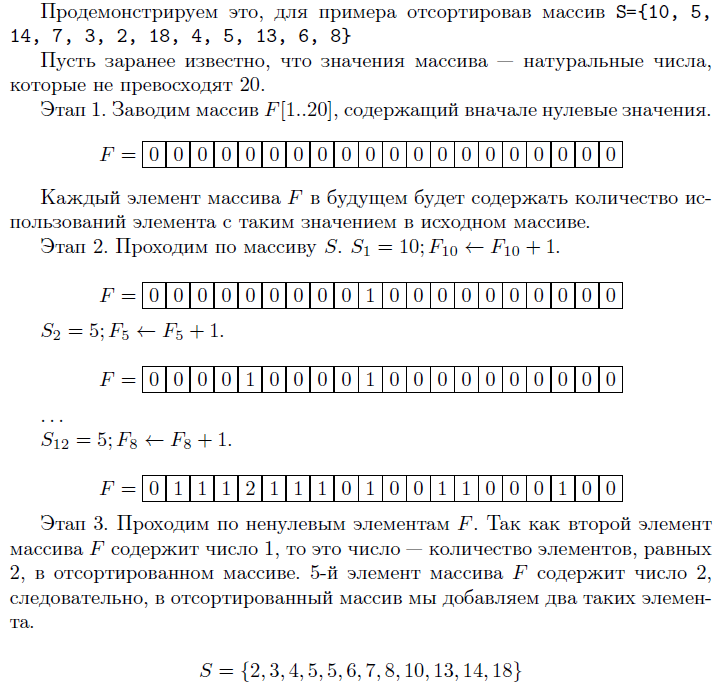

In [12]:
# Так можно добавлять картинки

from IPython.display import Image # вызов из библиотеки определённой функции
Image("Сортировка подсчётом.png")              # вызов функции и передача ей в качестве аргумента пути к файлу 

# (в данном случае фаил находится в той же папке)

In [25]:
lst = [0] * 101
for i in map(int, input().split()):
    lst[i] += 1 
srt = []
for i in range(len(lst)):
    srt.extend([i] * lst[i])
print(*srt)

1 2 3 44 3 2 3 5 7 8 9 0
0 1 2 2 3 3 3 5 7 8 9 44


In [40]:
def CountSort(list):
    sortedList = [0] * 101
    for i in list:
        sortedList[i] += 1
    for i in range(101):
        print((str(i) + ' ') * sortedList[i], end='') 
list = [int(i) for i in input().split()]
CountSort(list)

1 2 3 44 3 2 3 5 7 8 9 0
0 1 2 2 3 3 3 5 7 8 9 44 

# Пример. Число $\pi$

In [2]:
from sympy import *
import numpy as np
import time
import pylab
import matplotlib.pyplot as plt

AttributeError: module 'sympy' has no attribute 'external'

In [5]:

# Выведем заданное колличество знаков числа pi
npi=100;
print('Выведем %i знаков числа пи:\n' %npi, pi.n(npi));

Выведем 100 знаков числа пи:
 3.141592653589793238462643383279502884197169399375105820974944592307816406286208998628034825342117068


Конвертируем дробную часть числа $\pi$ в список:

In [35]:
PI = [int(i) for i in str(pi.n(npi))[2:]]

In [37]:
print(PI, end=' ')

[1, 4, 1, 5, 9, 2, 6, 5, 3, 5, 8, 9, 7, 9, 3, 2, 3, 8, 4, 6, 2, 6, 4, 3, 3, 8, 3, 2, 7, 9, 5, 0, 2, 8, 8, 4, 1, 9, 7, 1, 6, 9, 3, 9, 9, 3, 7, 5, 1, 0, 5, 8, 2, 0, 9, 7, 4, 9, 4, 4, 5, 9, 2, 3, 0, 7, 8, 1, 6, 4, 0, 6, 2, 8, 6, 2, 0, 8, 9, 9, 8, 6, 2, 8, 0, 3, 4, 8, 2, 5, 3, 4, 2, 1, 1, 7, 0, 6, 7, 9, 8, 2, 1, 4, 8, 0, 8, 6, 5, 1, 3, 2, 8, 2, 3, 0, 6, 6, 4, 7, 0, 9, 3, 8, 4, 4, 6, 0, 9, 5, 5, 0, 5, 8, 2, 2, 3, 1, 7, 2, 5, 3, 5, 9, 4, 0, 8, 1, 2, 8, 4, 8, 1, 1, 1, 7, 4, 5, 0, 2, 8, 4, 1, 0, 2, 7, 0, 1, 9, 3, 8, 5, 2, 1, 1, 0, 5, 5, 5, 9, 6, 4, 4, 6, 2, 2, 9, 4, 8, 9, 5, 4, 9, 3, 0, 3, 8, 1, 9, 6, 4, 4, 2, 8, 8, 1, 0, 9, 7, 5, 6, 6, 5, 9, 3, 3, 4, 4, 6, 1, 2, 8, 4, 7, 5, 6, 4, 8, 2, 3, 3, 7, 8, 6, 7, 8, 3, 1, 6, 5, 2, 7, 1, 2, 0, 1, 9, 0, 9, 1, 4, 5, 6, 4, 8, 5, 6, 6, 9, 2, 3, 4, 6, 0, 3, 4, 8, 6, 1, 0, 4, 5, 4, 3, 2, 6, 6, 4, 8, 2, 1, 3, 3, 9, 3, 6, 0, 7, 2, 6, 0, 2, 4, 9, 1, 4, 1, 2, 7, 3, 7, 2, 4, 5, 8, 7, 0, 0, 6, 6, 0, 6, 3, 1, 5, 5, 8, 8, 1, 7, 4, 8, 8, 1, 5, 2, 0, 9, 2, 0, 9, 6, 2, 

Кроме того, можем считать цифры дробной части числа $\pi$ из файла (в котором храняться 10 000 000 его символов):

In [48]:
f = open("pi-10million.txt")  #  открываем файл
fs = f.readline(npi)          #  считываем из него npi символов
f.close()                     #  закроем файл

In [49]:
fs

'1415926'

In [50]:
Pi = [int(i) for i in fs]
print(Pi)

[1, 4, 1, 5, 9, 2, 6]


# Упражнение. Сортировка $\pi$

Сравните временную сложность всех рассмотренных алгоритмов сортировки на примере цифр числа $\pi$.

Воспользуйтесь для этого замером времени с помощью библиотеки tame. Пример:

In [17]:
start_time = time.time()
PI2 = insertion_sort(PI) 
Tame=time.time()-start_time
print (PI2)
print(Tame)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 

In [40]:
ik = 11
Tame = np.zeros(ik)
NPI = [(i+1)*50 for i in range(ik)]
i=0
for npi in NPI:
    PI = [int(i) for i in str(pi.n(npi))[2:]]
    start_time = time.time()
    PI2 = insertion_sort(PI) 
    Tame[i]=time.time()-start_time
    i+=1

	 size	 Tame(sec)
	 50 	 0.000e+00
	 100 	 1.995e-03
	 150 	 9.973e-04
	 200 	 5.984e-03
	 250 	 4.989e-03
	 300 	 3.987e-03
	 350 	 1.097e-02
	 400 	 1.197e-02
	 450 	 1.097e-02
	 500 	 1.695e-02
	 550 	 3.092e-02


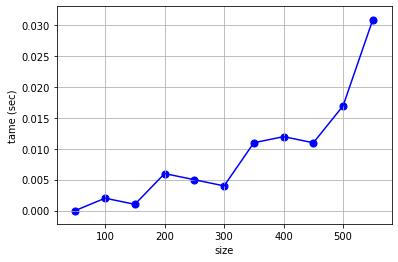

In [41]:
print('\t size\t Tame(sec)')
for i in range(0,ik):
    print ('\t %i \t %.3e' %(NPI[i], Tame[i]))

# график функции
pylab.figure ()
plt.plot(NPI, Tame, c='b')
plt.scatter(NPI, Tame, c='b',s=50)
# параметры графика
xl = plt.xlabel("size");
yl = plt.ylabel("tame (sec)");
plt.grid(True);
plt.show();

# Пример. Последовательный поиск

In [6]:
def dummy_search (a, key):
    n = len(a)
    for i in range(n):
        if a[i] == key:
            return i
    return n

In [7]:
ary = [7,8,1,2,3,4,13,5,1,2,44,5,1]
print(dummy_search (ary, 13))

6


In [8]:
# вероятно чуть более рациональная реализация
def clever_search (a, key):
    n = len(a)
    i=0
    while a[i]!=key:
        i=i+1
    return i

In [4]:
ary2 = [7,8,1,2,3,4,13,5,1,2,44,5,1,44]
print(clever_search (ary2, 13))

6


In [10]:
%timeit dummy_search (ary, 44)
    
%timeit clever_search (ary2, 44)

2.3 µs ± 208 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
2.84 µs ± 211 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


# Упражнение. Поиск в $\pi$

Найдите в дробной части числа $\pi$ порядковый номер каждой цифры начиная с 1 встретившейся количество раз равное её значению (первую единицу, вторую двойку и т.д.)

In [1]:

#решение не совсем верное. Надо выводить значение по key и его индекс в массиве, то есть вывести именно третью тройку и ее индекс, четвертую четверку и ее индекс, вторую двойку и ее индекс и т.д. (смотря что ввести в key)
def clever_search_number (a):
    lst=[0]*len(a)
    i=0
    for i in map(int, a):
        lst[i] += 1
        print("%3i - это %d-е число %d" % (i, lst[i], a[i]))

ary2 = [1, 4, 1, 5, 9, 2, 6, 5, 3, 5, 8, 9, 7, 9, 3, 2, 3, 8, 4, 6, 2, 6, 4, 3, 3, 8, 3, 2, 7, 9, 5, 0, 2, 8, 8, 4, 1, 9, 7, 1, 6, 9, 3, 9, 9, 3, 7, 5, 1, 0, 5, 8, 2, 0, 9, 7, 4, 9, 4, 4, 5, 9, 2, 3, 0, 7, 8, 1, 6, 4, 0, 6, 2, 8, 6, 2, 0, 8, 9, 9, 8, 6, 2, 8, 0, 3, 4, 8, 2, 5, 3, 4, 2, 1, 1, 7, 0, 6, 7, 9, 8, 2, 1, 4, 8, 0, 8, 6, 5, 1, 3, 2, 8, 2, 3, 0, 6, 6, 4, 7, 0, 9, 3, 8, 4, 4, 6, 0, 9, 5, 5, 0, 5, 8, 2, 2, 3, 1, 7, 2, 5, 3, 5, 9, 4, 0, 8, 1, 2, 8, 4, 8, 1, 1, 1, 7, 4, 5, 0, 2, 8, 4, 1, 0, 2, 7, 0, 1, 9, 3, 8, 5, 2, 1, 1, 0, 5, 5, 5, 9, 6, 4, 4, 6, 2, 2, 9, 4, 8, 9, 5, 4, 9, 3, 0, 3, 8, 1, 9, 6, 4, 4, 2, 8, 8, 1, 0, 9, 7, 5, 6, 6, 5, 9, 3, 3, 4, 4, 6, 1, 2, 8, 4, 7, 5, 6, 4, 8, 2, 3, 3, 7, 8, 6, 7, 8, 3, 1, 6, 5, 2, 7, 1, 2, 0, 1, 9, 0, 9, 1, 4, 5, 6, 4, 8, 5, 6, 6, 9, 2, 3, 4, 6, 0, 3, 4, 8, 6, 1, 0, 4, 5, 4, 3, 2, 6, 6, 4, 8, 2, 1, 3, 3, 9, 3, 6, 0, 7, 2, 6, 0, 2, 4, 9, 1, 4, 1, 2, 7, 3, 7, 2, 4, 5, 8, 7, 0, 0, 6, 6, 0, 6, 3, 1, 5, 5, 8, 8, 1, 7, 4, 8, 8, 1, 5, 2, 0, 9, 2, 0, 9, 6, 2, 8, 2, 9, 2, 5, 4, 0, 9, 1, 7, 1, 5, 3, 6, 4, 3, 6, 7, 8, 9, 2, 5, 9, 0, 3, 6, 0, 0, 1, 1, 3, 3, 0, 5, 3, 0, 5, 4, 8, 8, 2, 0, 4, 6, 6, 5, 2, 1, 3, 8, 4, 1, 4, 6, 9, 5, 1, 9, 4, 1, 5, 1, 1, 6, 0, 9, 4, 3, 3, 0, 5, 7, 2, 7, 0, 3, 6, 5, 7, 5, 9, 5, 9, 1, 9, 5, 3, 0, 9, 2, 1, 8, 6, 1, 1, 7, 3, 8, 1, 9, 3, 2, 6, 1, 1, 7, 9, 3, 1, 0, 5, 1, 1, 8, 5, 4, 8, 0, 7, 4, 4, 6, 2, 3, 7, 9, 9, 6, 2, 7, 4, 9, 5, 6, 7, 3, 5, 1, 8, 8, 5, 7, 5, 2, 7, 2, 4, 8, 9, 1, 2, 2, 7, 9, 3, 8, 1, 8, 3, 0, 1, 1, 9, 4, 9, 1, 2, 9, 8, 3, 3, 6, 7, 3, 3, 6, 2, 4, 4, 0, 6, 5, 6, 6, 4, 3, 0, 8, 6, 0, 2, 1, 3, 9, 4, 9, 4, 6, 3, 9, 5, 2, 2, 4, 7, 3, 7, 1, 9, 0, 7, 0, 2, 1, 7, 9, 8, 6, 0, 9, 4, 3, 7, 0, 2, 7, 7, 0, 5, 3, 9, 2, 1, 7, 1, 7, 6, 2, 9, 3, 1, 7, 6, 7, 5, 2, 3, 8, 4, 6, 7, 4, 8, 1, 8, 4, 6, 7, 6, 6, 9, 4, 0, 5, 1, 3, 2, 0, 0, 0, 5, 6, 8, 1, 2, 7, 1, 4, 5, 2, 6, 3, 5, 6, 0, 8, 2, 7, 7, 8, 5, 7, 7, 1, 3, 4, 2, 7, 5, 7, 7, 8, 9, 6, 0, 9, 1, 7, 3, 6, 3, 7, 1, 7, 8, 7, 2, 1, 4, 6, 8, 4, 4, 0, 9, 0, 1, 2, 2, 4, 9, 5, 3, 4, 3, 0, 1, 4, 6, 5, 4, 9, 5, 8, 5, 3, 7, 1, 0, 5, 0, 7, 9, 2, 2, 7, 9, 6, 8, 9, 2, 5, 8, 9, 2, 4]

print(clever_search_number (ary2))

  1 - это 1-е число 4
  4 - это 1-е число 9
  1 - это 2-е число 4
  5 - это 1-е число 2
  9 - это 1-е число 5
  2 - это 1-е число 1
  6 - это 1-е число 6
  5 - это 2-е число 2
  3 - это 1-е число 5
  5 - это 3-е число 2
  8 - это 1-е число 3
  9 - это 2-е число 5
  7 - это 1-е число 5
  9 - это 3-е число 5
  3 - это 2-е число 5
  2 - это 2-е число 1
  3 - это 3-е число 5
  8 - это 2-е число 3
  4 - это 2-е число 9
  6 - это 2-е число 6
  2 - это 3-е число 1
  6 - это 3-е число 6
  4 - это 3-е число 9
  3 - это 4-е число 5
  3 - это 5-е число 5
  8 - это 3-е число 3
  3 - это 6-е число 5
  2 - это 4-е число 1
  7 - это 2-е число 5
  9 - это 4-е число 5
  5 - это 4-е число 2
  0 - это 1-е число 1
  2 - это 5-е число 1
  8 - это 4-е число 3
  8 - это 5-е число 3
  4 - это 4-е число 9
  1 - это 3-е число 4
  9 - это 5-е число 5
  7 - это 3-е число 5
  1 - это 4-е число 4
  6 - это 4-е число 6
  9 - это 6-е число 5
  3 - это 7-е число 5
  9 - это 7-е число 5
  9 - это 8-е число 5
  3 - это 

In [42]:
ary2 = [1, 4, 1, 5, 9, 2, 6, 5, 3, 5, 8, 9, 7, 9, 3, 2, 3, 8, 4, 6, 2, 6, 4, 3, 3, 8, 3, 2, 7, 9, 5, 0, 2, 8, 8, 4, 1, 9, 7, 1, 6, 9, 3, 9, 9, 3, 7, 5, 1, 0, 5, 8, 2, 0, 9, 7, 4, 9, 4, 4, 5, 9, 2, 3, 0, 7, 8, 1, 6, 4, 0, 6, 2, 8, 6, 2, 0, 8, 9, 9, 8, 6, 2, 8, 0, 3, 4, 8, 2, 5, 3, 4, 2, 1, 1, 7, 0, 6, 7, 9, 8, 2, 1, 4, 8, 0, 8, 6, 5, 1, 3, 2, 8, 2, 3, 0, 6, 6, 4, 7, 0, 9, 3, 8, 4, 4, 6, 0, 9, 5, 5, 0, 5, 8, 2, 2, 3, 1, 7, 2, 5, 3, 5, 9, 4, 0, 8, 1, 2, 8, 4, 8, 1, 1, 1, 7, 4, 5, 0, 2, 8, 4, 1, 0, 2, 7, 0, 1, 9, 3, 8, 5, 2, 1, 1, 0, 5, 5, 5, 9, 6, 4, 4, 6, 2, 2, 9, 4, 8, 9, 5, 4, 9, 3, 0, 3, 8, 1, 9, 6, 4, 4, 2, 8, 8, 1, 0, 9, 7, 5, 6, 6, 5, 9, 3, 3, 4, 4, 6, 1, 2, 8, 4, 7, 5, 6, 4, 8, 2, 3, 3, 7, 8, 6, 7, 8, 3, 1, 6, 5, 2, 7, 1, 2, 0, 1, 9, 0, 9, 1, 4, 5, 6, 4, 8, 5, 6, 6, 9, 2, 3, 4, 6, 0, 3, 4, 8, 6, 1, 0, 4, 5, 4, 3, 2, 6, 6, 4, 8, 2, 1, 3, 3, 9, 3, 6, 0, 7, 2, 6, 0, 2, 4, 9, 1, 4, 1, 2, 7, 3, 7, 2, 4, 5, 8, 7, 0, 0, 6, 6, 0, 6, 3, 1, 5, 5, 8, 8, 1, 7, 4, 8, 8, 1, 5, 2, 0, 9, 2, 0, 9, 6, 2, 8, 2, 9, 2, 5, 4, 0, 9, 1, 7, 1, 5, 3, 6, 4, 3, 6, 7, 8, 9, 2, 5, 9, 0, 3, 6, 0, 0, 1, 1, 3, 3, 0, 5, 3, 0, 5, 4, 8, 8, 2, 0, 4, 6, 6, 5, 2, 1, 3, 8, 4, 1, 4, 6, 9, 5, 1, 9, 4, 1, 5, 1, 1, 6, 0, 9, 4, 3, 3, 0, 5, 7, 2, 7, 0, 3, 6, 5, 7, 5, 9, 5, 9, 1, 9, 5, 3, 0, 9, 2, 1, 8, 6, 1, 1, 7, 3, 8, 1, 9, 3, 2, 6, 1, 1, 7, 9, 3, 1, 0, 5, 1, 1, 8, 5, 4, 8, 0, 7, 4, 4, 6, 2, 3, 7, 9, 9, 6, 2, 7, 4, 9, 5, 6, 7, 3, 5, 1, 8, 8, 5, 7, 5, 2, 7, 2, 4, 8, 9, 1, 2, 2, 7, 9, 3, 8, 1, 8, 3, 0, 1, 1, 9, 4, 9, 1, 2, 9, 8, 3, 3, 6, 7, 3, 3, 6, 2, 4, 4, 0, 6, 5, 6, 6, 4, 3, 0, 8, 6, 0, 2, 1, 3, 9, 4, 9, 4, 6, 3, 9, 5, 2, 2, 4, 7, 3, 7, 1, 9, 0, 7, 0, 2, 1, 7, 9, 8, 6, 0, 9, 4, 3, 7, 0, 2, 7, 7, 0, 5, 3, 9, 2, 1, 7, 1, 7, 6, 2, 9, 3, 1, 7, 6, 7, 5, 2, 3, 8, 4, 6, 7, 4, 8, 1, 8, 4, 6, 7, 6, 6, 9, 4, 0, 5, 1, 3, 2, 0, 0, 0, 5, 6, 8, 1, 2, 7, 1, 4, 5, 2, 6, 3, 5, 6, 0, 8, 2, 7, 7, 8, 5, 7, 7, 1, 3, 4, 2, 7, 5, 7, 7, 8, 9, 6, 0, 9, 1, 7, 3, 6, 3, 7, 1, 7, 8, 7, 2, 1, 4, 6, 8, 4, 4, 0, 9, 0, 1, 2, 2, 4, 9, 5, 3, 4, 3, 0, 1, 4, 6, 5, 4, 9, 5, 8, 5, 3, 7, 1, 0, 5, 0, 7, 9, 2, 2, 7, 9, 6, 8, 9, 2, 5, 8, 9, 2, 4]

lst = [0] * len(ary2)
for i in map(int, ary2):
    lst[i] += 1
 
srt = []
for i in range(len(lst)):
    srt.extend([i] * lst[i])
 
print(*srt)

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 

# Домашнее задание (базовое):

# Задание 1.

Найдите в числе $\pi$ номер цифры в дробной части после которой идёт последовательность из:

- шести 9;
- шесть 8;
- шесть 0;
- первых шести цифр;
- семь цифр вашего номера телефона.

In [4]:
import time
start_time_1 = time.time()

f = open("pi-10million.txt")
npi = 10000000
fs = f.readline(npi)
Pi_t = [int(i) for i in fs]

def search_sequence_in_pi(sequence):
    sequence_length = len(sequence)
    k = 0
    temp_sequence = []
    for i in range(npi):
        if Pi_t[i] == sequence[k] and k < sequence_length:
            temp_sequence.append(Pi_t[i])
            if sequence == temp_sequence:
                num = i - k - 1
                print(Pi_t[num + 1 : num + 1 + sequence_length])
                return num
            k = k + 1
        else:
            k = 0
            temp_sequence = []
            
print("Номер цифры, после которой идут шесть 9")       
print(search_sequence_in_pi([9, 9, 9, 9, 9, 9]))
print("Номер цифры, после которой идут шесть 8")     
print(search_sequence_in_pi([8, 8, 8, 8, 8, 8]))
print("Номер цифры, после которой идут шесть 0")     
print(search_sequence_in_pi([0, 0, 0, 0, 0, 0]))
print("Номер цифры, после которой идут первые шесть цифр")     
print(search_sequence_in_pi([1, 4, 1, 5, 9, 2]))
print("Номер цифры, после которой идет номер телефона")     
print(search_sequence_in_pi([5,4,3,2]))

Tame_1 = time.time()-start_time_1
print("--- %s seconds ---" % (Tame_1))

Номер цифры, после которой идут шесть 9
[9, 9, 9, 9, 9, 9]
761
Номер цифры, после которой идут шесть 8
[8, 8, 8, 8, 8, 8]
222298
Номер цифры, после которой идут шесть 0
[0, 0, 0, 0, 0, 0]
1699926
Номер цифры, после которой идут первые шесть цифр
[1, 4, 1, 5, 9, 2]
0
Номер цифры, после которой идет номер телефона
[5, 4, 3, 2]
271
--- 6.6688947677612305 seconds ---


# Задание 2. Поиск в отсортированном массиве

Реализуйте алгоритмы сужения области:

- бинарный поиск (https://ru.wikipedia.org/wiki/%D0%94%D0%B2%D0%BE%D0%B8%D1%87%D0%BD%D1%8B%D0%B9_%D0%BF%D0%BE%D0%B8%D1%81%D0%BA)
- метод золотого сечения (https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%B7%D0%BE%D0%BB%D0%BE%D1%82%D0%BE%D0%B3%D0%BE_%D1%81%D0%B5%D1%87%D0%B5%D0%BD%D0%B8%D1%8F)
- интерполирующий поиск (https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D1%82%D0%B5%D1%80%D0%BF%D0%BE%D0%BB%D1%8F%D1%86%D0%B8%D0%BE%D0%BD%D0%BD%D1%8B%D0%B9_%D0%BF%D0%BE%D0%B8%D1%81%D0%BA)

(см. лекцию 3 с. 17)

In [5]:
from random import random
import math
import time
start_time_2 = time.time()

def binary_search(array, number):
    Tame_binary_search = time.time()-start_time_2
    print("Tame_binary_search = %s seconds ---" % (Tame_binary_search))
    array_length = len(array)
    left = 0
    time_binary_search = 0
    right = array_length - 1
    while left <= right:
        midle = (left + right) // 2
        if number < array[midle]:
            right = midle - 1
        elif number > array[midle]:
            left = midle + 1
        else:
            return midle


def interpolation_search(array, number):
    Tame_interpolation_search = time.time()-start_time_2
    print("interpolation_search = %s seconds ---" % (Tame_interpolation_search))
    array_length = len(array)
    left = 0
    right = array_length - 1 
    while array[left] < number and array[right] > number:
        midle = left + ((number - array[left]) * (right - left)) // (array[right] - array[left]) 
        if array[midle] < number:
            left = midle + 1
        elif array[midle] > number:
            right = midle - 1
        else:
            return midle
    if array[left] == number:
        return left
    if array[right] == number:
        return right
    return None
 

    
def golden_section_search(array, number):  
    Tame_golden_section_search = time.time()-start_time_2
    print("golden_section_search = %s seconds ---" % (Tame_golden_section_search))
    phi_inv =  1 / ((math.sqrt(5) + 1) * 0.5)
    array_length = len(array)
    left = 0
    right = array_length - 1
    
    def calculate_x1(left, right):
        return right - round((right - left) * phi_inv)
    
    def calculate_x2(left, right):
        return left + round((right - left) * phi_inv) 

    x1, x2 = calculate_x1(left, right), calculate_x2(left, right)
    while x1 < x2:
        if number > array[x1]:
            left = x1
            x1 = x2
            x2 = calculate_x2(left, right)
        else:
            right = x2
            x2 = x1
            x1 = calculate_x1(left, right)
            
    if number == array[left]:
        return left

    if number == array[right]:
        return right
    if number == array[x1]:
        return x1

    if number == array[x2]:
        return x2
    return None
 
    
N = 10
array = []
for i in range(N):
    array.append(int(random()*10))
print(f"Исходный массив {array}")
array.sort() 
print(f"Отсортированный массив {array}")    
print("Бинарный поиск")    
print(binary_search(array, 5))
print("Интерполяционный поиск")   
print(interpolation_search(array, 5))
print("Метод золотого сечения")   
print(golden_section_search(array, 5))

Tame_2 = time.time()-start_time_2
print("--- %s seconds ---" % (Tame_2))   

Исходный массив [8, 6, 6, 5, 9, 2, 1, 3, 6, 8]
Отсортированный массив [1, 2, 3, 5, 6, 6, 6, 8, 8, 9]
Бинарный поиск
Tame_binary_search = 0.00299835205078125 seconds ---
3
Интерполяционный поиск
interpolation_search = 0.00299835205078125 seconds ---
3
Метод золотого сечения
golden_section_search = 0.0039980411529541016 seconds ---
3
--- 0.004996776580810547 seconds ---


# Задание 3.

Сравните производительность алгоритмов из задания 2 на задании 1.

In [6]:
print("1--- %s seconds ---" % (Tame_1))
print("2--- %s seconds ---" % (Tame_2))

1--- 6.6688947677612305 seconds ---
2--- 0.004996776580810547 seconds ---


# Задание "Нахождение статистики и медианы"

Напишите программу реализующую алгоритм нахождения $k$-й порядковой статистики методом «разделяй и властвуй»:
- выберем случайным образом элемент $v$ массива $S$;
- разобьём массив на три: $S_l$, элементы которого меньше, чем $v$; $S_v$, элементы которого равны $v$, и $S_r$, элементы которого больше, чем $v$;
- введём функцию $Selection(S, k)$, где $S$ — массив, а $k$ — номер порядковой статистики:

$$ Selection(S, k) =  \begin{cases}
                           Selection(S_l, k), k \leq |S_l| \\
                           v, |S_l| < k \leq |S_l| + |S_v| \\
                           Selection(S_r, k - |S_l| - |S_v|), k > |S_l| + |S_v|
                      \end{cases} $$
                      
(Попробуёте написать программу в двух вариантах: на основе рекурсии и на основе цикла.)

In [10]:
from random import random

arr_min = []
arr_max = []
arr_rav = []  
    
N = 10
array = []

for i in range(N):
    array.append(int(random()*10))
print(f"Исходный массив {array}")

v = array [int(random()*len(array))]
print(f"V = {v}")

def razbiv (N, v, array):
    for i in range(N):
        if (array[i] < v):
            arr_min.append(array[i])
        
        elif (array[i] > v):
            arr_max.append(array[i])
       
        elif (array[i] == v):
            arr_rav.append(array[i])
    print (f"arr_min = {arr_min}")
    print (f"arr_max = {arr_max}")
    print (f"arr_rav = {arr_rav}")
    
def selection (S,k):
    global v
    if (k <= len(arr_min)):
        selection(arr_min,k)
    elif (k > len(arr_min)+len(arr_rav)):
        selection (arr_max,k - len(arr_min) - len(arr_rav))
    else: 
        return v

razbiv (N, v, array)
selection (array,3)

Исходный массив [0, 3, 9, 3, 2, 1, 6, 2, 6, 4]
V = 2
arr_min = [0, 1]
arr_max = [3, 9, 3, 6, 6, 4]
arr_rav = [2, 2]


2

# Домашнее задание (дополнительное):

# Задание "Пирамидальная сортировка"

Напишите программу (функцию) реализующую алгоритм пирамидальной сортировки (https://ru.wikipedia.org/wiki/%D0%9F%D0%B8%D1%80%D0%B0%D0%BC%D0%B8%D0%B4%D0%B0%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D1%81%D0%BE%D1%80%D1%82%D0%B8%D1%80%D0%BE%D0%B2%D0%BA%D0%B0,
https://habr.com/ru/post/221095/,
Алгоритмы. Справочник с примерами на C, C , Java и Python (Хайнеман Дж., и др - 2017) с. 87).

In [19]:
from random import random
import math

def heapify(arr, N, i):
    largest = i 
    l = 2 * i + 1   
    r = 2 * i + 2   
    if l < N and arr[i] < arr[l]:
        largest = l
    if r < N and arr[largest] < arr[r]:
        largest = r
    if largest != i:
        arr[i],arr[largest] = arr[largest],arr[i] 
        heapify(arr, N, largest)

def heapSort(arr):
    N = len(arr)
    for i in range(N, -1, -1):
        heapify(arr, N, i)
    for i in range(n-1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i] 
        heapify(arr, i, 0)

N = 15
arr = []
for i in range(N):
    arr.append(int(random()*100))
print(f"Исходный массив {arr}")
heapSort(arr)
print ("Отсоритрованный массив")
for i in range(N):
    print ("%d" %arr[i], end = ' '),

Исходный массив [74, 85, 54, 58, 82, 7, 5, 76, 79, 65, 26, 52, 32, 38, 21]
Отсоритрованный массив
5 7 21 26 32 38 52 54 58 65 74 76 79 82 85 

# Задание "Малые тела"

Есть база данных малых тел солнечной системы созданная под эгидой Международного астрономического союза. Файл с этой базой можно скачать здесь https://www.minorplanetcenter.net/iau/MPCORB/MPCORB.DAT, а здесь приведено его описание https://www.minorplanetcenter.net/iau/info/MPOrbitFormat.html

Отсортируйте эту базу по названию малого тела. Напишите две программы реализующие поиск в отсортированном и неотсартированном массивах. В последнем случае поиск может производиться по любому параметру из таблицы.

In [11]:
token = open('MPCORB.txt','r')
linestoken=token.readlines()
resulttoken=[] 
for x in linestoken:
    resulttoken.append(x.split('\t'))
token.close()
print(resulttoken)




[["Des'n     H     G   Epoch     M        Peri.      Node       Incl.       e            n           a        Reference #Obs #Opp    Arc    rms  Perts   Computer\n"], ['\n'], ['----------------------------------------------------------------------------------------------------------------------------------------------------------------\n'], ['00001    3.52  0.15 K205V 162.68625   73.73166   80.28699   10.58862  0.0775571  0.21406009   2.7676568  0 E2020-SJ6  7216 118 1801-2020 0.83 M-v 36k Pan        0000      (1) Ceres              20200716\n'], ['00002    4.21  0.15 K205V 144.97567  310.20239  173.02474   34.83293  0.2299723  0.21334459   2.7738414  0 E2020-SJ6  8384 114 1821-2020 0.79 M-v 2Ek Pan        0000      (2) Pallas             20200913\n'], ['00003    5.26  0.15 K205V 125.43535  248.06619  169.85148   12.99105  0.2569364  0.22612870   2.6682853  0 E2020-QM5  7902 116 1804-2020 0.47 M-v 3Ek Pan        0000      (3) Juno               20200707\n'], ['00004    3.28  0.15 K205V